In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.dropna(inplace=True)

In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### 지수 가중 이동 평균과 단일 지수 평활법 비교

#### 지수 가중 이동 평규 

In [6]:
span = 12 # 12개월
alpha = 2 / (span + 1)

In [9]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [19]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


#### 단일 지수 평활법 

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [14]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [16]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [20]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [21]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<AxesSubplot: xlabel='Month'>

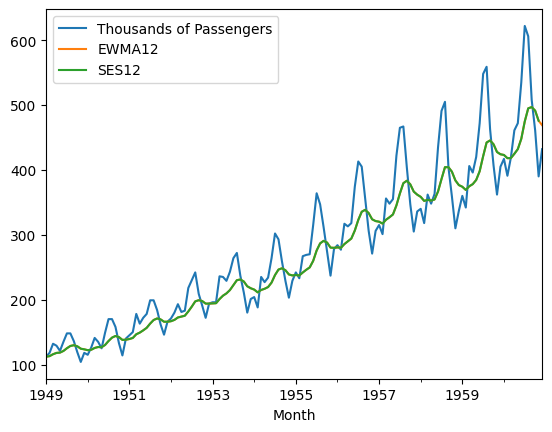

In [22]:
df[['Thousands of Passengers', 'EWMA12', 'SES12']].plot()

### 이중 지수 평활법 (덧셈모델)

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [24]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,113.479115
1949-02-01,118,112.923077,112.923077,119.471753
1949-03-01,132,115.857988,115.857988,133.450947
1949-04-01,129,117.879836,117.879836,130.496253
1949-05-01,121,118.359861,118.359861,122.509277


<AxesSubplot: xlabel='Month'>

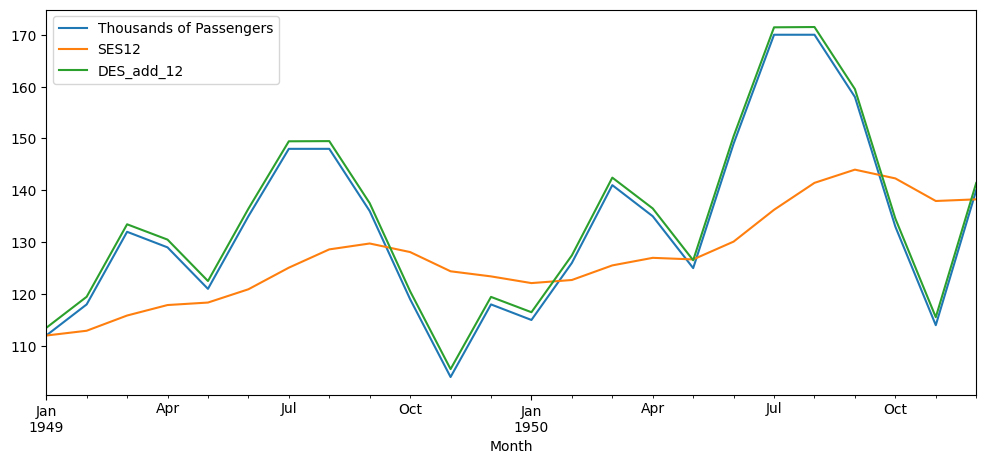

In [28]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))

<AxesSubplot: xlabel='Month'>

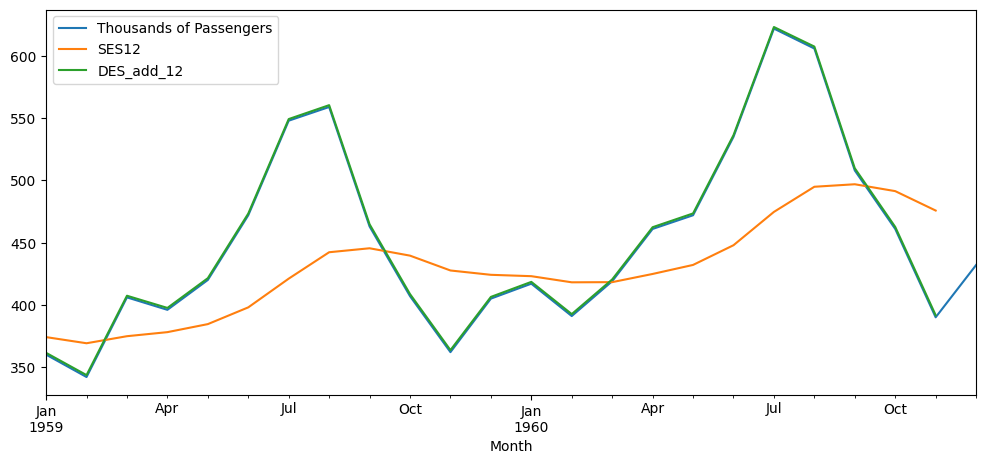

In [29]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))

### 이중 지수 평활법 (곱셈모델)

In [30]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,113.479115,113.990701
1949-02-01,118,112.923077,112.923077,119.471753,120.031669
1949-03-01,132,115.857988,115.857988,133.450947,134.235979
1949-04-01,129,117.879836,117.879836,130.496253,131.270786
1949-05-01,121,118.359861,118.359861,122.509277,123.156267


<AxesSubplot: xlabel='Month'>

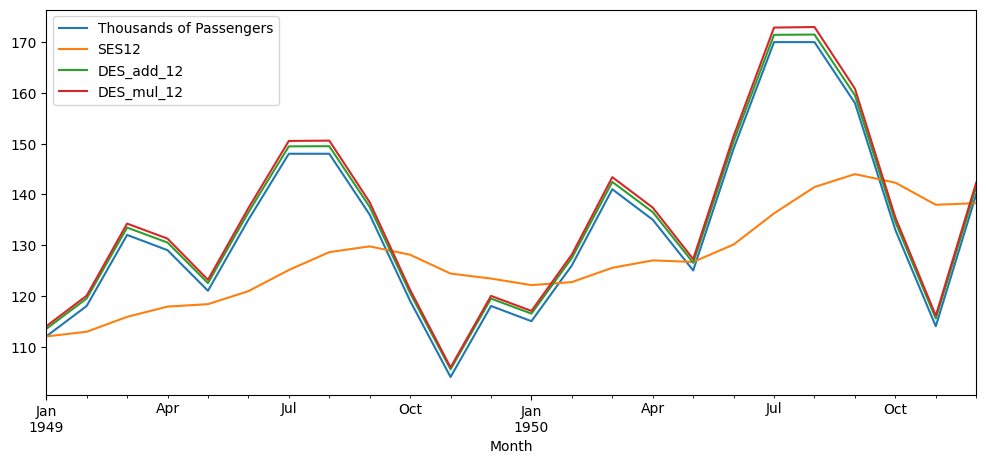

In [31]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5))

<AxesSubplot: xlabel='Month'>

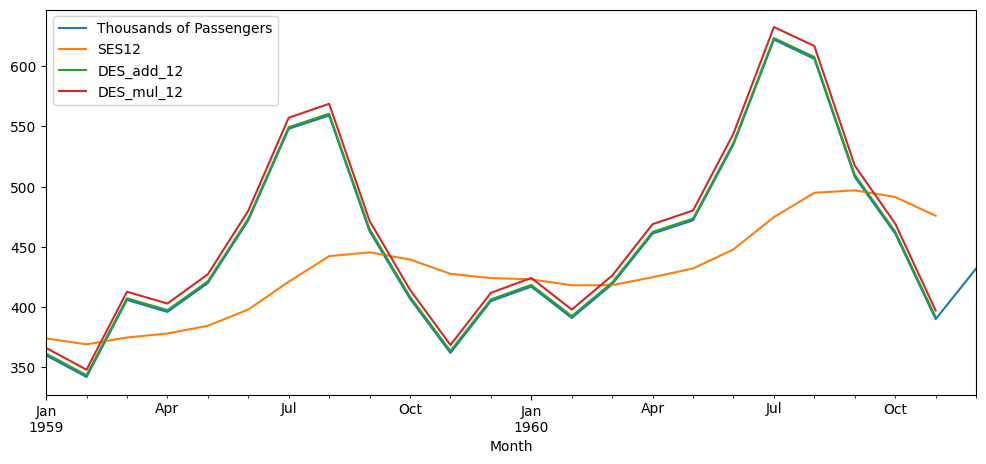

In [32]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5))

### 삼중 지수 평활법

In [33]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df.head()

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,113.479115,113.990701,111.596245
1949-02-01,118,112.923077,112.923077,119.471753,120.031669,118.843545
1949-03-01,132,115.857988,115.857988,133.450947,134.235979,133.334959
1949-04-01,129,117.879836,117.879836,130.496253,131.270786,127.900398
1949-05-01,121,118.359861,118.359861,122.509277,123.156267,120.979783


<AxesSubplot: xlabel='Month'>

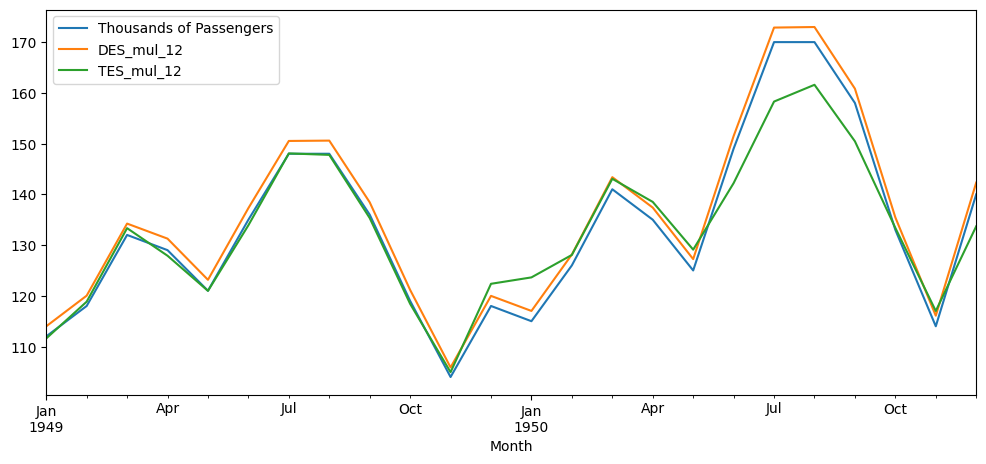

In [35]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,5))